# 1 ggplot2入门笔记1—ggplot2简要教程 
ggplot2是R中最优雅，美观的图形框架。它具有精心设计的结构。本教程重点介绍可用于制作任何ggplot的基础结构。但是，在ggplot2中绘制图的方式与使学习曲线陡峭的基本图形截然不同。因此，将您对基本图形的了解留在后面并继续。您距离破解ggplot拼图只有5个步骤。该章节主要内容有：
1. 设置 The Setup
2. 图层 The Layers
3. 标签 The Labels
4. 主题 The Theme
5. 分面 The Facets
6. 常用函数 Commonly Used Features

**参考文档**
> http://r-statistics.co/ggplot2-Tutorial-With-R.html

## 1. 设置 The Setup
首先，您需要告诉ggplot使用什么数据集。这是使用ggplot(df)函数完成的，其中df是一个数据框，其中包含制作绘图所需的所有功能。这是最基本的步骤。与基础图形不同，ggplot不会将矢量作为参数。
您可以aes()通过指定数据集中的各个变量，将想要应用到ggplot（内部参数）的任何美学效果添加到其中-例如X和Y轴。颜色，大小，形状基于其更改的变量也可以在此处自行指定。此处指定的美学将被您随后添加的所有geom层继承。如果以后打算添加更多的图层（可能是折线图顶部的条形图），则可以在添加这些图层时指定各自的外观。

下面，我展示了一些如何在自身diamonds随附的数据集中使用ggplot的示例ggplot2。但是，在添加几何图层之前，不会展示任何图像。

In [1]:
# 调用ggplot2库
library(ggplot2)
# 展示金刚石数据集
head(diamonds)

Warning message:
"package 'ggplot2' was built under R version 3.6.1"


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


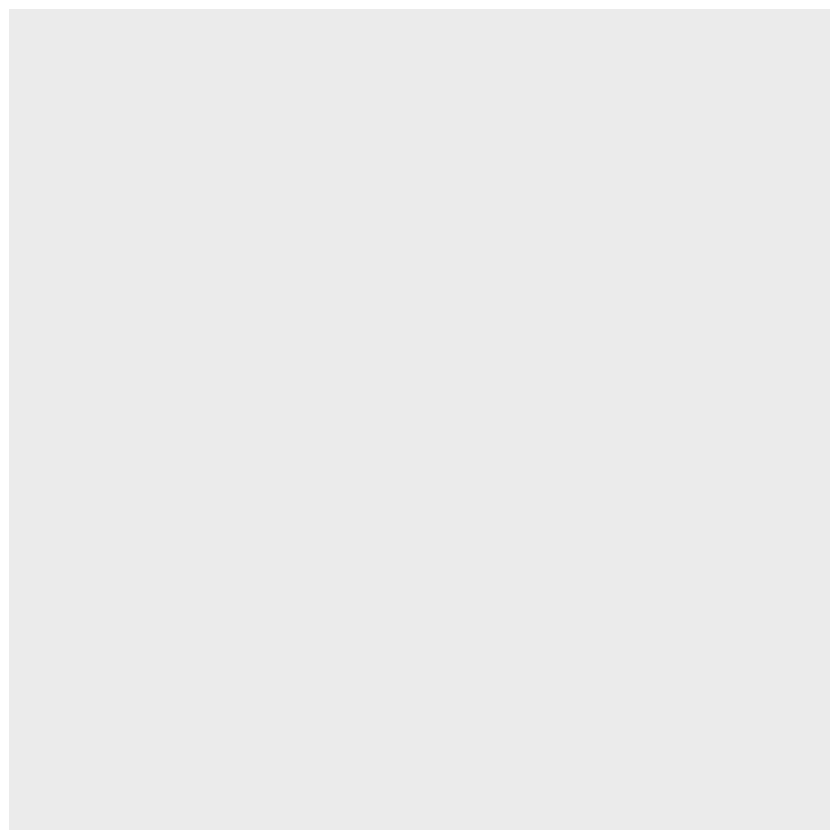

In [2]:
# if only the dataset is known. 只显示数据
ggplot(diamonds)

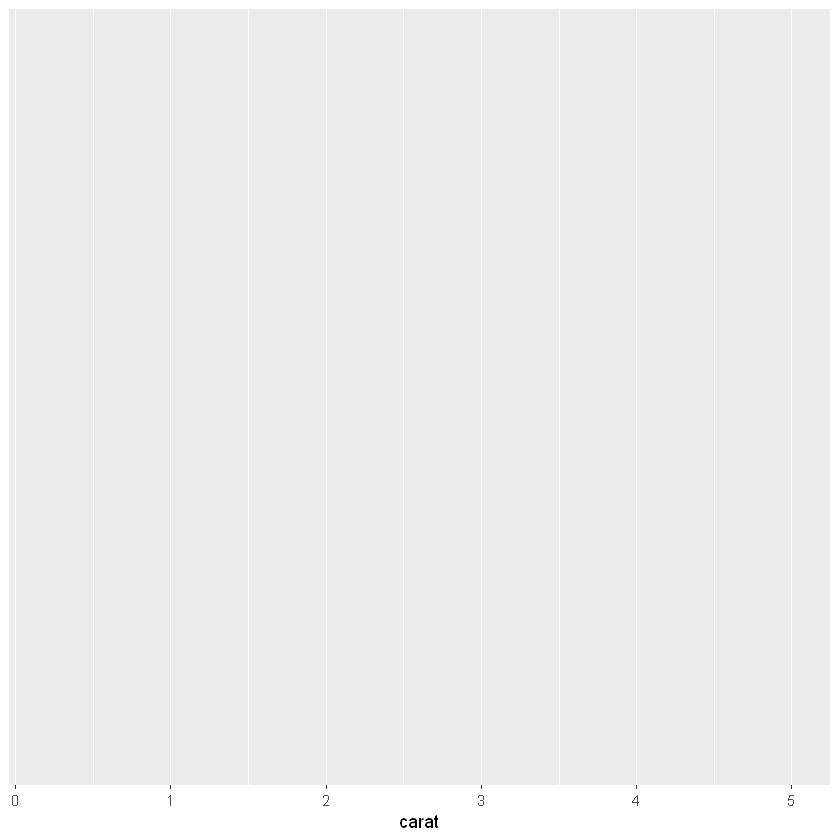

In [3]:
# if only X-axis is known. The Y-axis can be specified in respective geoms.
# 只设定x轴，y轴数据可以在geoms中指定
ggplot(diamonds, aes(x=carat))  

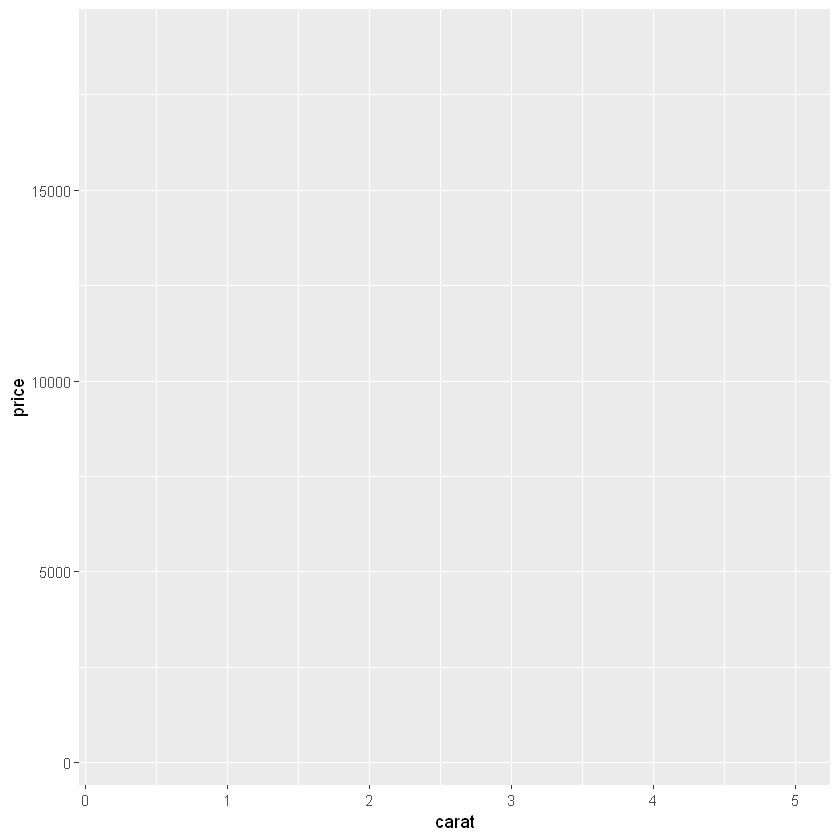

In [4]:
# if both X and Y axes are fixed for all layers.
# 指定x轴和y轴
ggplot(diamonds, aes(x=carat, y=price))  

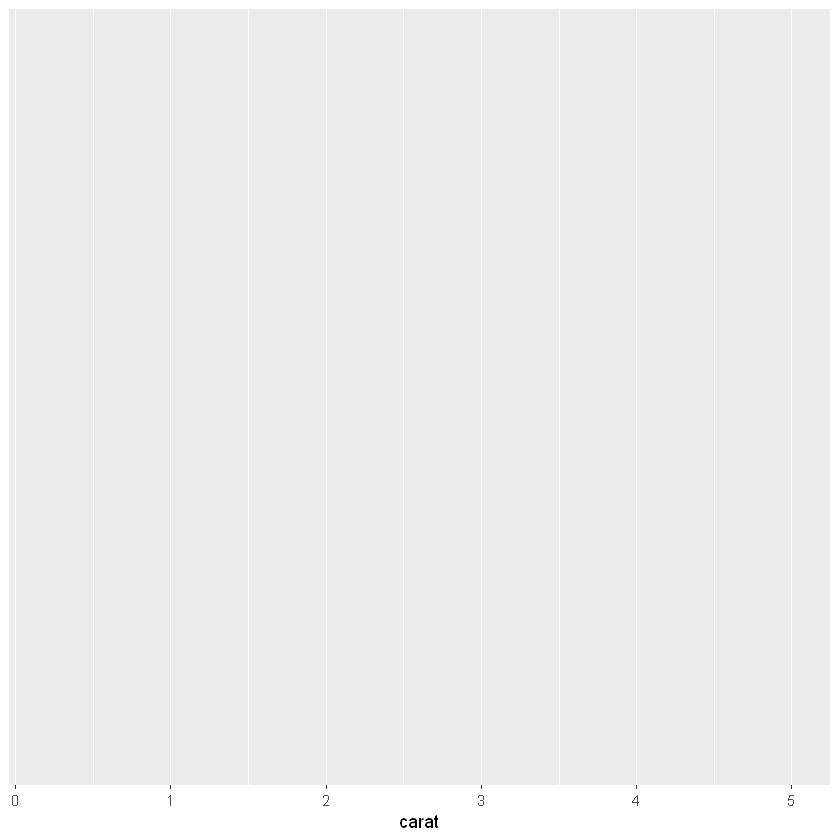

In [5]:
# Each category of the 'cut' variable will now have a distinct color, once a geom is added.
# 指定颜色类别cut
ggplot(diamonds, aes(x=carat, color=cut)) 

aes代表美学。ggplot2还将图的X轴和Y轴以及颜色，大小，形状，填充等也视为美观特征。如果要固定颜色，大小等（即，不根据数据框中的变量而变化） ，您需要aes()像这样在之外指定它。有关更多颜色，请参见R语言调色板。

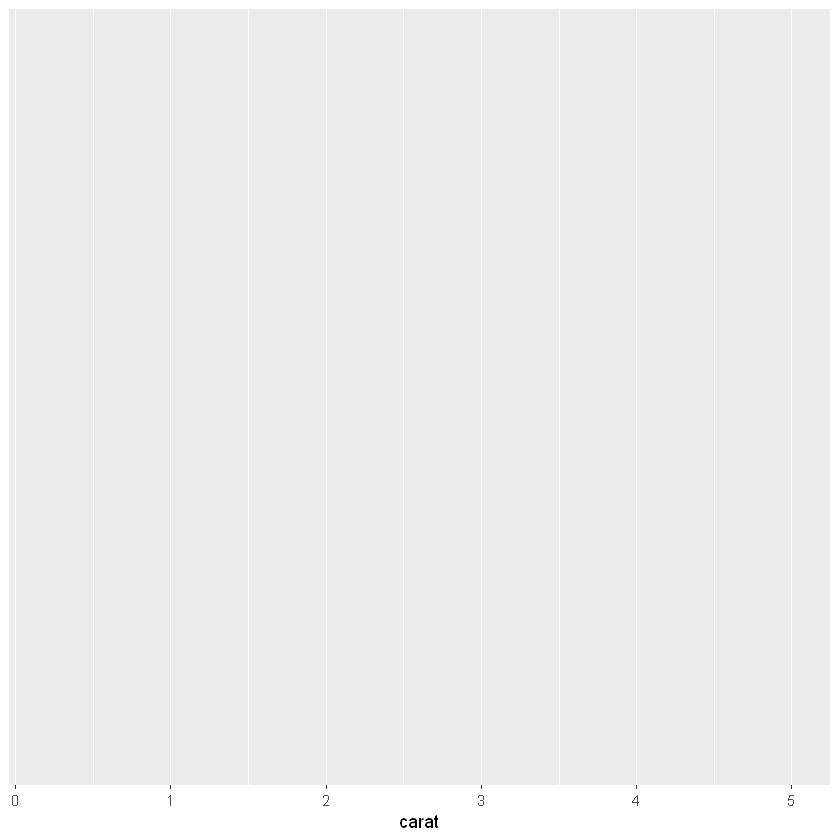

In [6]:
ggplot(diamonds, aes(x=carat), color="steelblue")

## 2. 图层 The Layers
ggplot2中的图层也称为“ geoms ”。基本设置完成后，您可以将几何图形一个附加在另一个图形之上。[此文档](https://ggplot2.tidyverse.org/reference/)提供了所有可用geoms的全面列表。

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



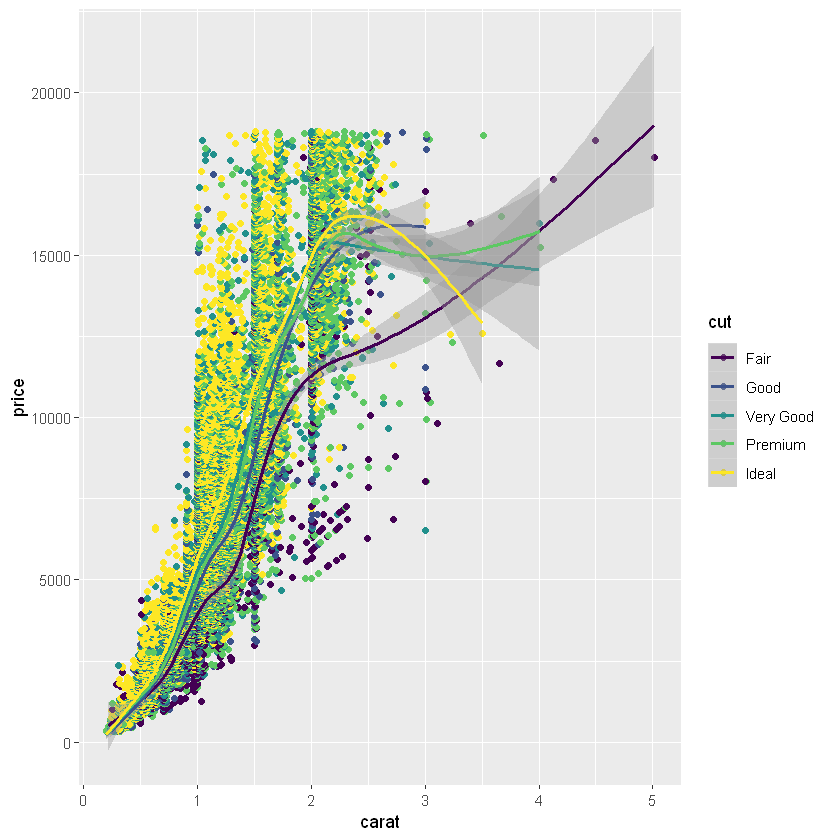

In [7]:
ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
# Adding scatterplot geom (layer1) 添加散点图
geom_point() + 
# Adding moothing geom (layer2) 在散点图的基础上添加一条平滑的趋势曲线
geom_smooth() 

我们在上图添加了两层（geom）- geom_point()和geom_smooth()。由于X轴Y轴和颜色是在ggplot()设置本身中定义的，因此这两层继承了那些美学。另外，您也可以如下所示在geom图层内指定这些外观

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



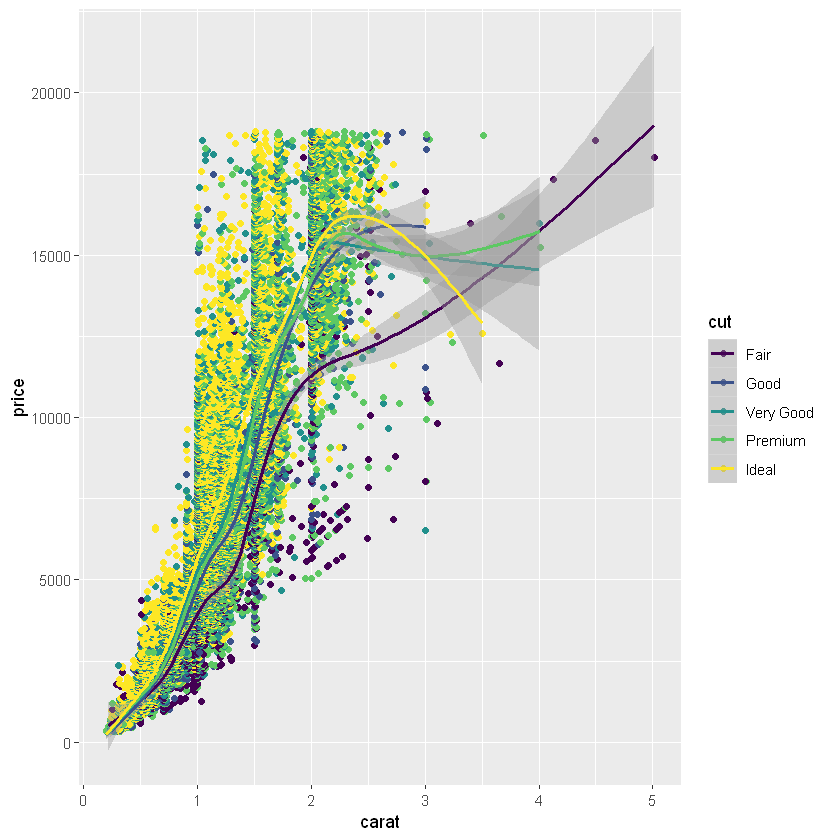

In [8]:
 # Same as above but specifying the aesthetics inside the geoms. 类似上面的结果
ggplot(diamonds) + 
geom_point(aes(x=carat, y=price, color=cut)) + 
geom_smooth(aes(x=carat, y=price, color=cut))

注意X和Y轴，以及点的颜色如何根据cut变量的值而变化。图例已自动添加。我想提出一个改变。cut我不想在每个级别上使用多条平滑线，而是将它们全部集成在一条线下。怎么做？color从geom_smooth()层次上消除美学将达到目的。

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



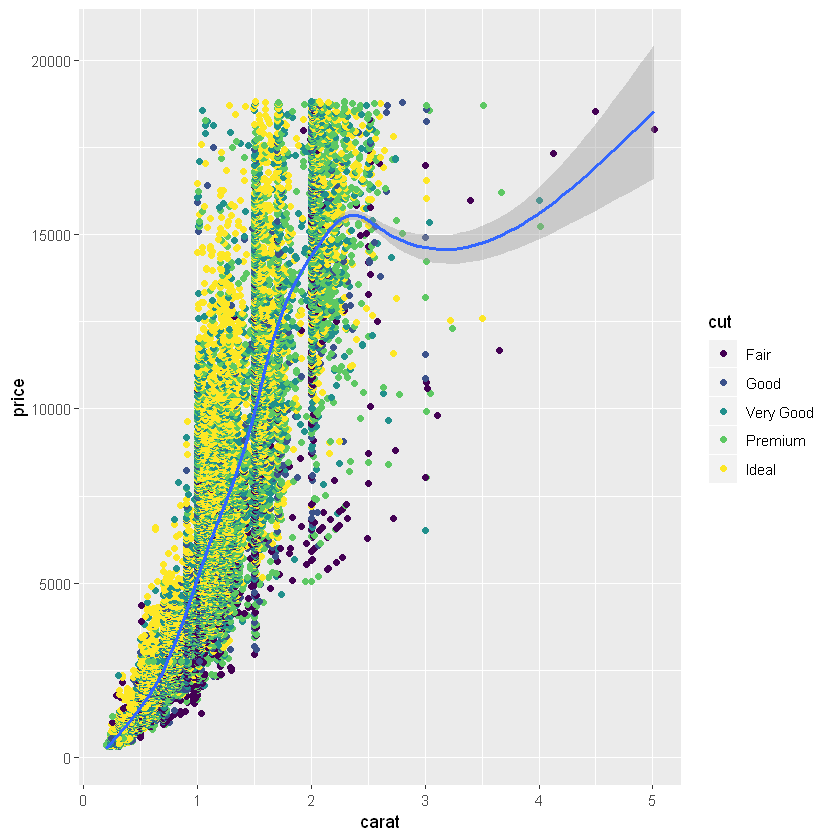

In [9]:
library(ggplot2)
ggplot(diamonds) + 
geom_point(aes(x=carat, y=price, color=cut)) + 
# Remove color from geom_smooth 只画一条拟合平滑线
geom_smooth(aes(x=carat, y=price)) 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



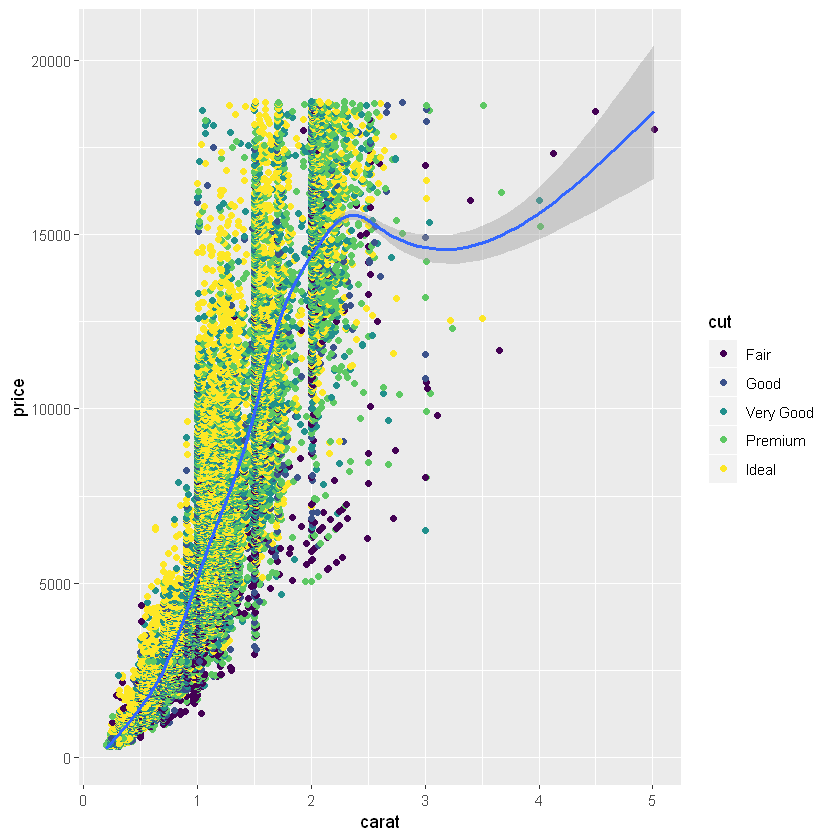

In [10]:
 # same but simpler 类似上图同样的功能
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point(aes(color=cut)) + 
geom_smooth() 

这对您来说是一个快速的挑战。可以使点的形状随color功能而变化吗？尽管设置过程花费了我们很多代码，但是增加诸如图层，每个cut的不同颜色等的复杂性却很容易。想象一下，如果要在基本图形中进行编写，必须编写多少代码？感谢ggplot2！

Warning message:
"Using shapes for an ordinal variable is not advised"
Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."
Warning message:
"Removed 2808 rows containing missing values (geom_point)."


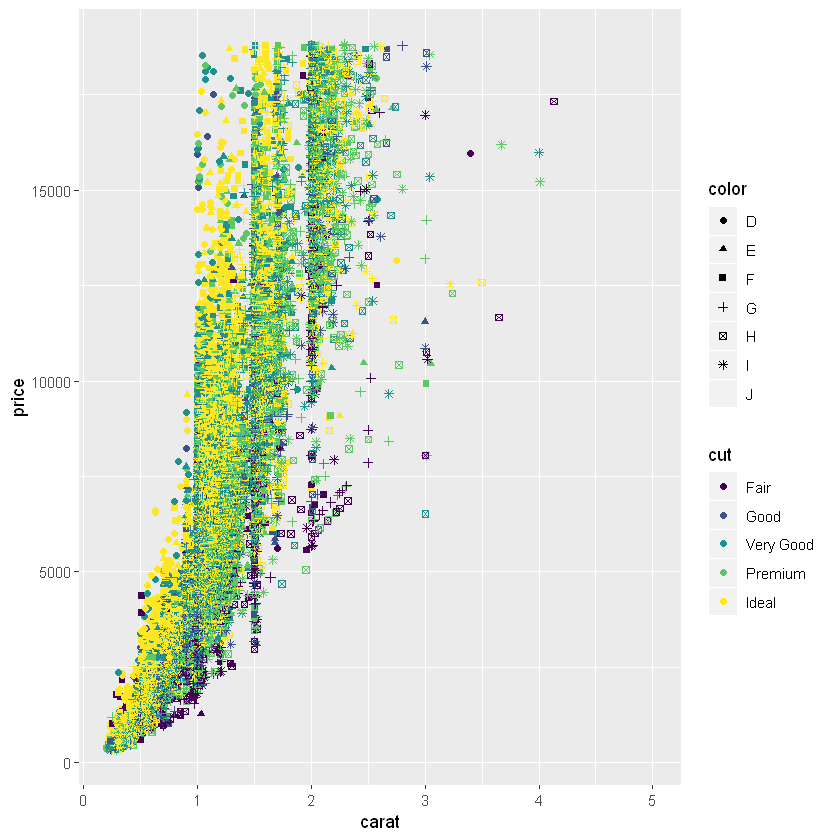

In [11]:
# Answer to the challenge 设置形状点
ggplot(diamonds, aes(x=carat, y=price, color=cut, shape=color)) + 
geom_point()

## 3. 标签 The Labels
现在，您已经绘制了图形的主要部分。您可能要添加图解的主要标题，并可能更改X和Y轴标题。这可以通过labs用于指定标签的层来完成。但是，操纵标签的大小，颜色是本文第四部分“主题”的工作。

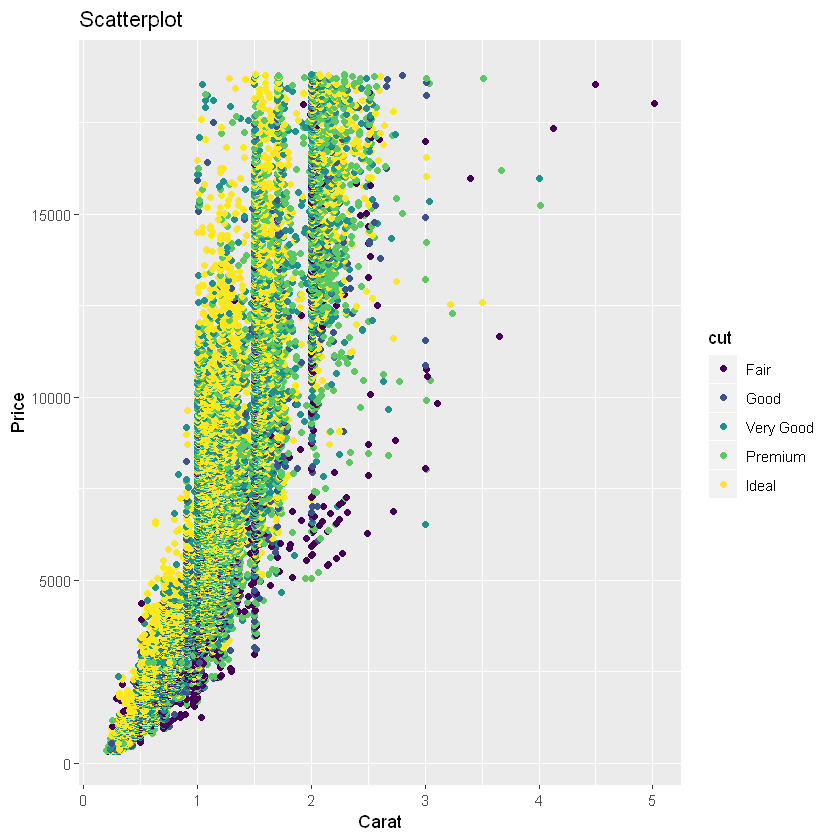

In [12]:
gg <- ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
geom_point() + 
# add axis lables and plot title 添加标签
labs(title="Scatterplot", x="Carat", y="Price")
print(gg)

图的主要标题已添加，并且X和Y轴标签大写。注意：如果要在函数内部显示ggplot，则需要显式保存它，然后使用进行打印print(gg)，就像我们上面所做的那样。

## 4. 主题 The Theme
除了我们要增加标签的大小并更改图例标题以外，几乎所有内容都已设置。调整标签的大小可以在theme()函数中通过设置功能plot.title，axis.text.x和axis.text.y。需要在中指定它们element_text()。如果要删除其中任何一个，请将其设置为element_blank()，它将完全消失。  
调整图例标题有些棘手。如果您的图例是某个color属性的图例，并且其根据因数而变化，则您需要设置scale_color_discrete()中的name，其中颜色部分属于color属性，而离散部分属于离散属性，因为图例是基于因数变量的。

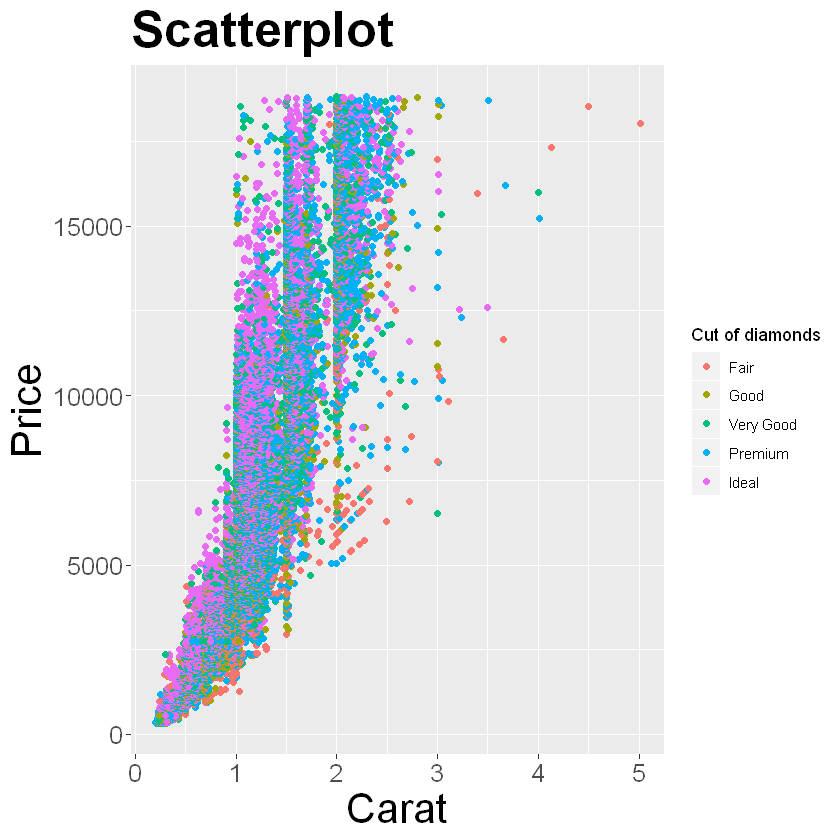

In [13]:
gg1 <- gg + 
    theme(
    # 设置标题大小，face="bold"字体加粗
        plot.title=element_text(size=30, face="bold"), 
        axis.text.x=element_text(size=15),
        axis.text.y=element_text(size=15),
        axis.title.x=element_text(size=25),
        axis.title.y=element_text(size=25)) +
    # add title and axis text, change legend title.
    # 添加渐变色，并设置颜色条图例标题
    scale_color_discrete(name="Cut of diamonds")  
print(gg1)  # print the plot

如果图例显示基于因子变量的形状属性，则需要使用scale_shape_discrete(name="legend title")进行更改。如果它是一个连续变量，改用scale_shape_continuous(name="legend title")。如果您的图例基于fill连续变量的属性，使用scale_fill_continuous(name="legend title")。

## 5. 分面 The Facets
在上一张图表中，您在同一张图表中具有所有不同cut绘制值的散点图。如果您想要每张图表一个cut值呢？就需要用到分面功能


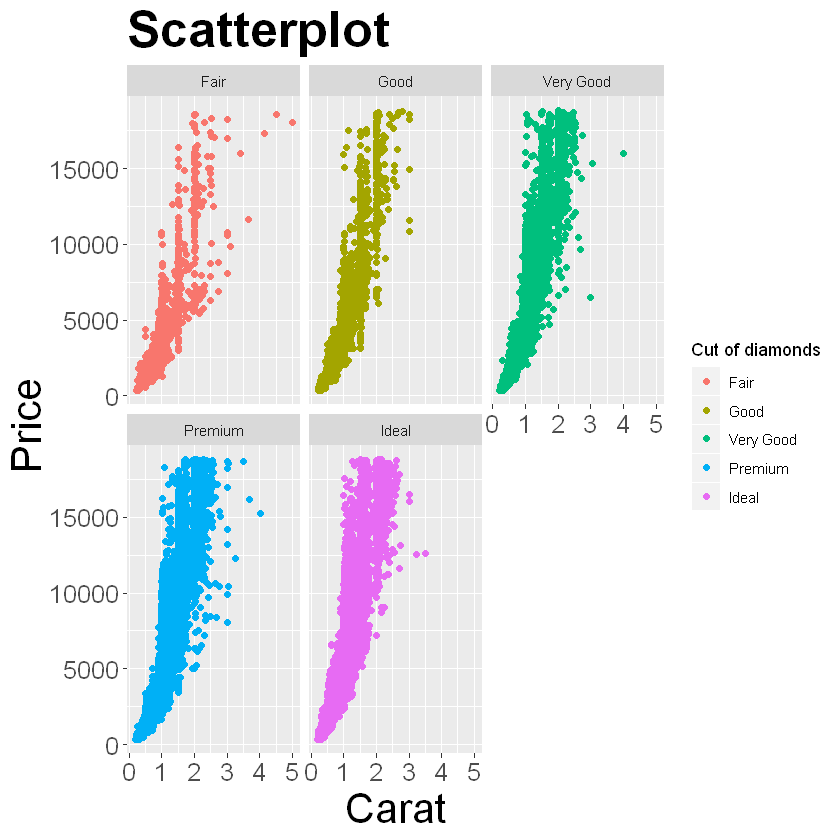

In [14]:
gg1 + facet_wrap( ~cut , ncol=3)

facet_wrap(formula)接受一个公式作为参数。右边的项目对应于列。左侧的项定义行。



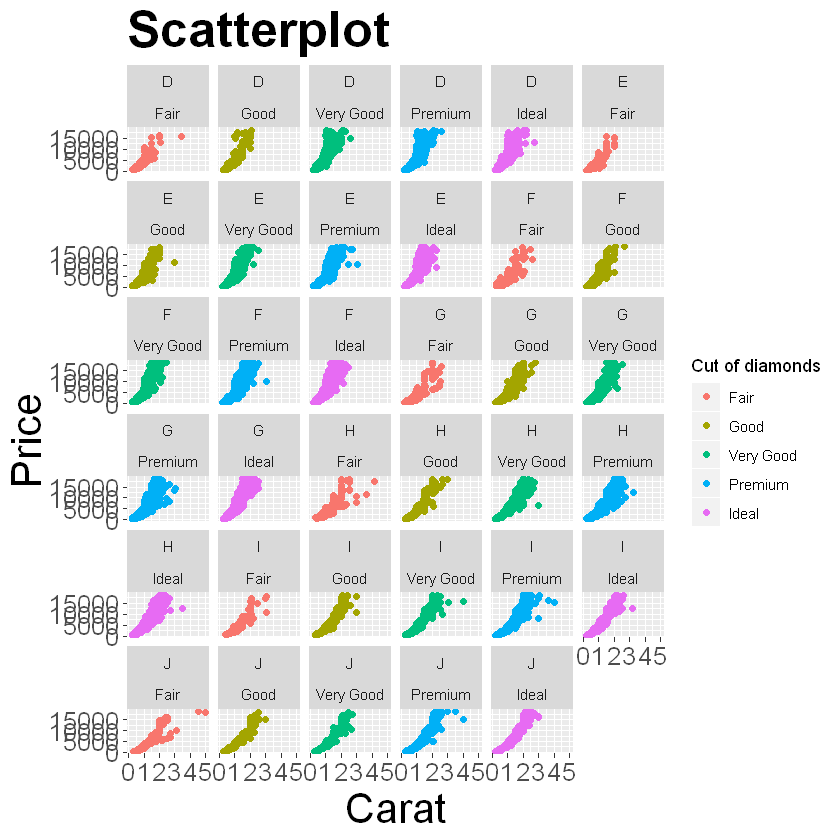

In [15]:
# row: color, column: cut
gg1 + facet_wrap(color ~ cut)  

facet_wrap，X和Y轴的比例固定为默认容纳所有点。这将使属性的比较有意义，因为它们的规模相同。但是，可以通过设置参数scales=free使比例尺自由调整，使图表看起来分布更均匀

In [16]:
# row: color, column: cut
# gg1 + facet_wrap(color ~ cut, scales="free")

出于比较目的，您也可以使用facet_grid(formula)将所有图在一个网格中。注意，各个图的标题已消失，为绘图区域留出更多空间。

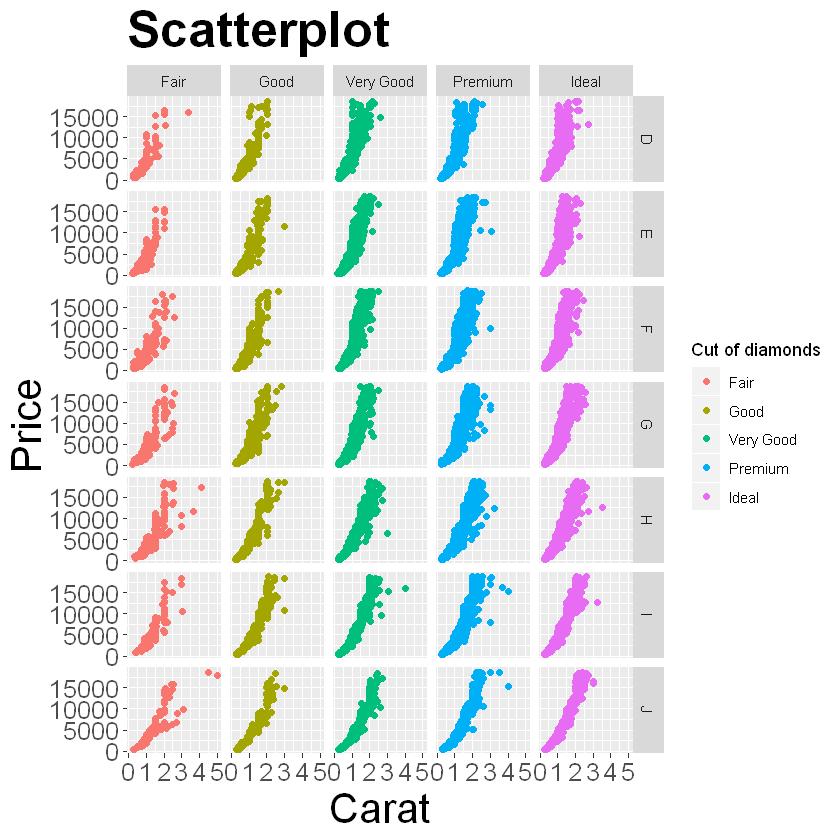

In [17]:
gg1 + facet_grid(color ~ cut) 

## 6. 常用函数 Commonly Used Features
主要内容如下：
+ 6.1 绘制时间序列图（使用ggfortify）
+ 6.2 在同一ggplot上绘制多个时间序列
+ 6.3 条形图
+ 6.4 自定义布局
+ 6.5 翻转坐标轴
+ 6.6 调整X和Y轴范围
+ 6.7 等坐标轴
+ 6.8 变更主题
+ 6.9 图例删除和更改位置
+ 6.10 网格线
+ 6.11 图边距和背景
+ 6.12 注释
+ 6.13 保存ggplot

### 6.1 绘制时间序列图（使用ggfortify）
ggfortify包使直接从时间序列对象绘制时间序列变得非常容易，而无需将其转换为数据帧。下面的示例一步绘制AirPassengers时间序列。[在此处](http://rpubs.com/sinhrks/plot_ts)查看更多ggfortify的自动绘图选项以绘制时间序列。

In [18]:
# 载入库
library(ggfortify)
# 查看数据
AirPassengers

Warning message:
"package 'ggfortify' was built under R version 3.6.1"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


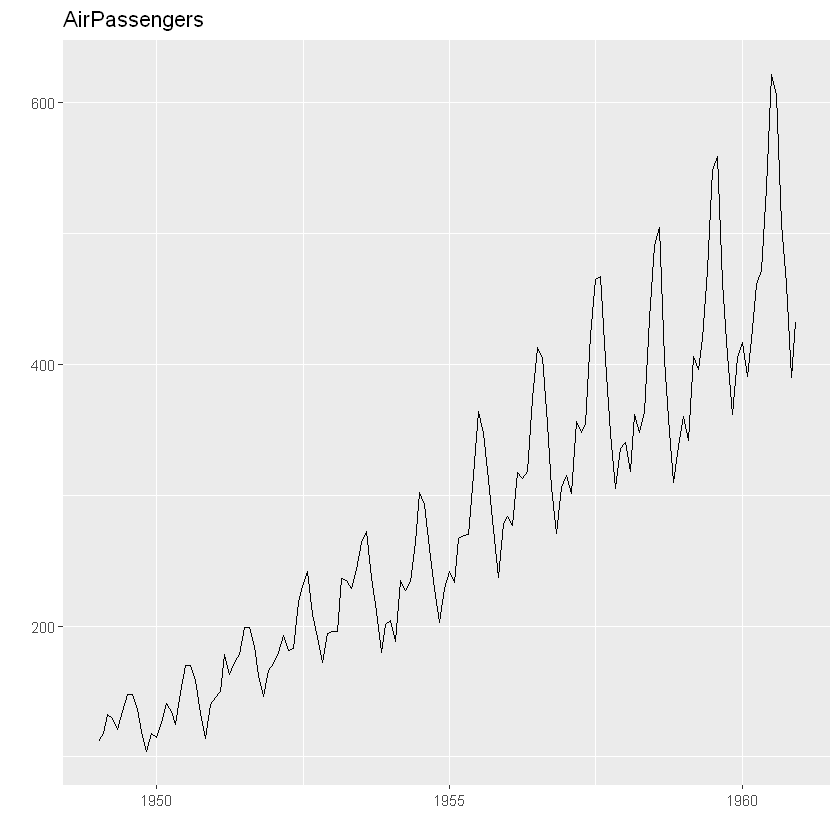

In [19]:
autoplot(AirPassengers) + 
labs(title="AirPassengers")

### 6.2 在同一ggplot上绘制多个时间序列  
绘制多个时间序列需要以数据文件格式拥有数据，其中一列是用于X轴的日期。

方法1：转换后，您只需要不断地将时间序列的多个层逐个添加。

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


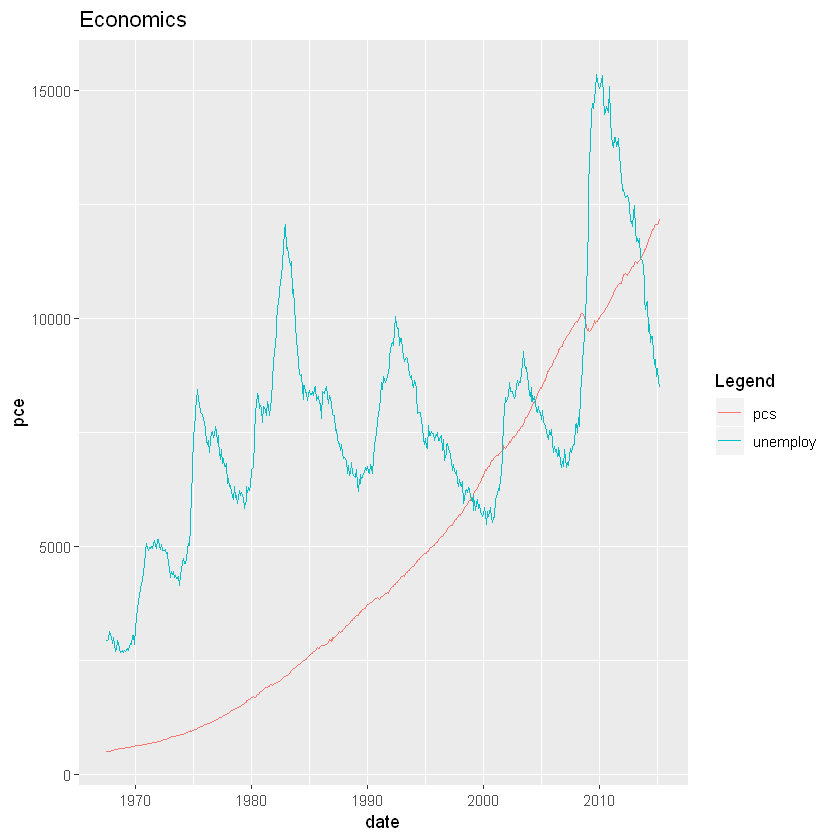

In [20]:
# Approach 1:
data(economics, package="ggplot2")  # init data
economics <- data.frame(economics)  # convert to dataframe
# 展示数据
head(economics)

# 画图
ggplot(economics) + 
# 画线条
geom_line(aes(x=date, y=pce, color="pcs")) + 
geom_line(aes(x=date, y=unemploy, col="unemploy")) + 
# 设定颜色
scale_color_discrete(name="Legend") + 
labs(title="Economics")

方法2：通过将id设置为date字段，使用reforme2：：Melt融合数据帧。然后只需添加一条geom_线，并将颜色美学设置为variable（这是在融化过程中创建的）。

Warning message:
"package 'reshape2' was built under R version 3.6.1"


date,variable,value
<date>,<fct>,<dbl>
1967-07-01,pce,506.7
1967-08-01,pce,509.8
1967-09-01,pce,515.6
1967-10-01,pce,512.2
1967-11-01,pce,517.4
1967-12-01,pce,525.1


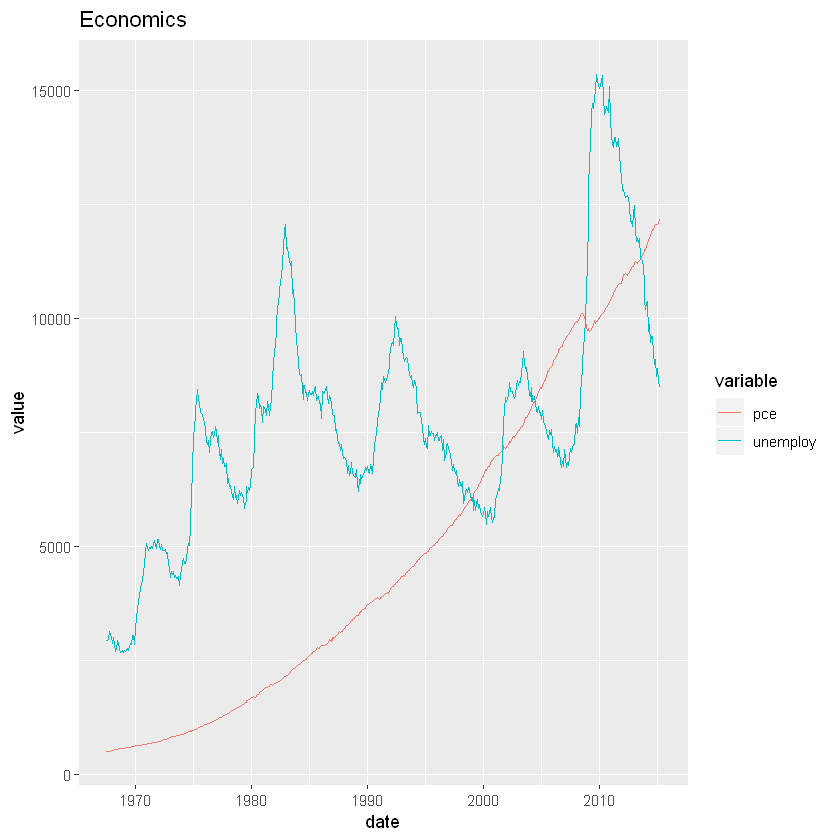

In [21]:
# Approach 2:
library(reshape2)
# 融合数据
df <- melt(economics[, c("date", "pce", "unemploy")], id="date")
head(df)

# 绘图
ggplot(df) + 
geom_line(aes(x=date, y=value, color=variable)) + 
labs(title="Economics")

ggplot2的缺点是不可能在同一图上获得多个Y轴。以相同的比例绘制多个时间序列会使序列中的几个看起来很小。一个替代方法是facet_wrap设置它scales='free'。



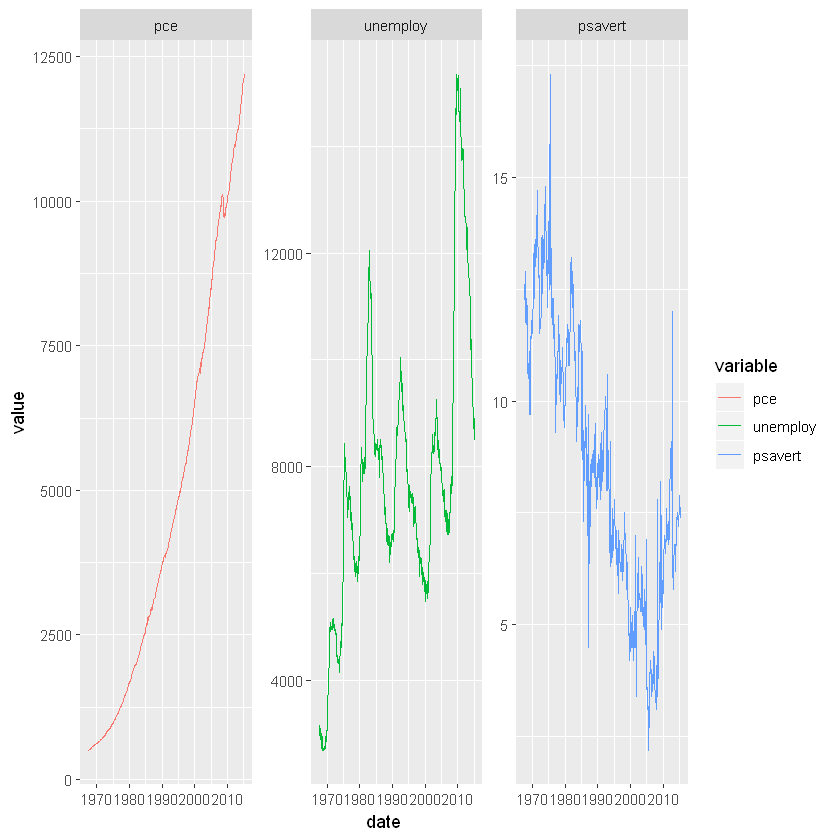

In [22]:
df <- melt(economics[, c("date", "pce", "unemploy", "psavert")], id="date")
ggplot(df) + 
geom_line(aes(x=date, y=value, color=variable)) +
facet_wrap( ~ variable, scales="free")

### 6.3 条形图  
默认情况下，ggplot会制作一个“计数”条形图，这意味着它会计算x美学指定的项目的频率并对其进行绘制。使用这种格式，您无需指定Y学。但是，如果您要制作Y给出的绝对数的条形图，则需要stat="identity"在内进行设置geom_ba。

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


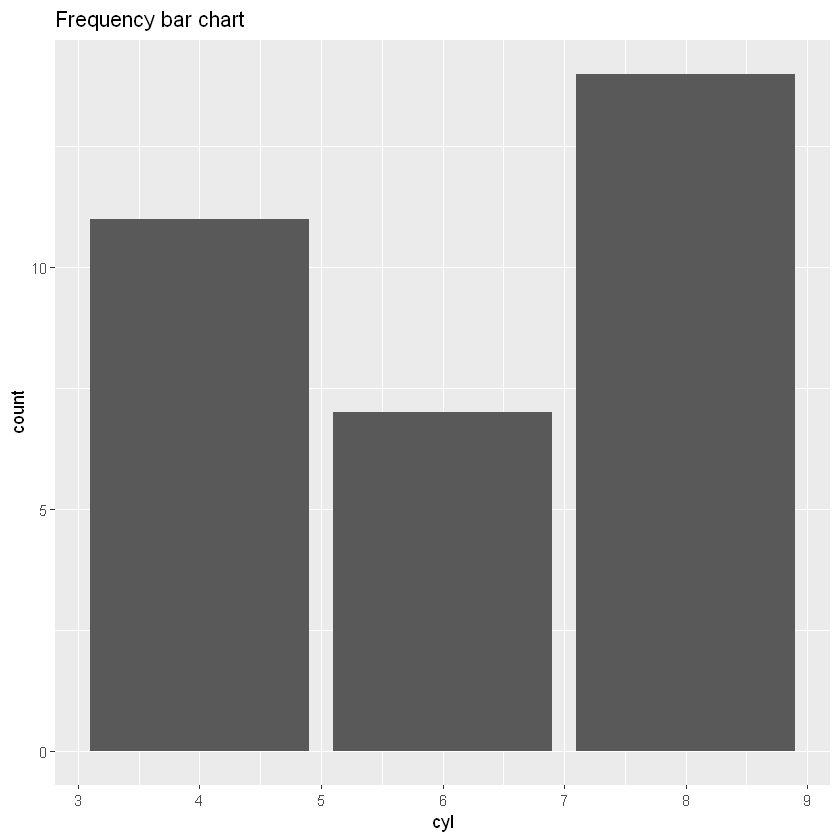

In [23]:
# 显示数据
head(mtcars)
plot1 <- ggplot(mtcars, aes(x=cyl)) + 
# 画柱状图
geom_bar() + 
# Y axis derived from counts of X item
labs(title="Frequency bar chart")  
print(plot1)

var,nums
<fct>,<int>
a,1
b,2
c,3


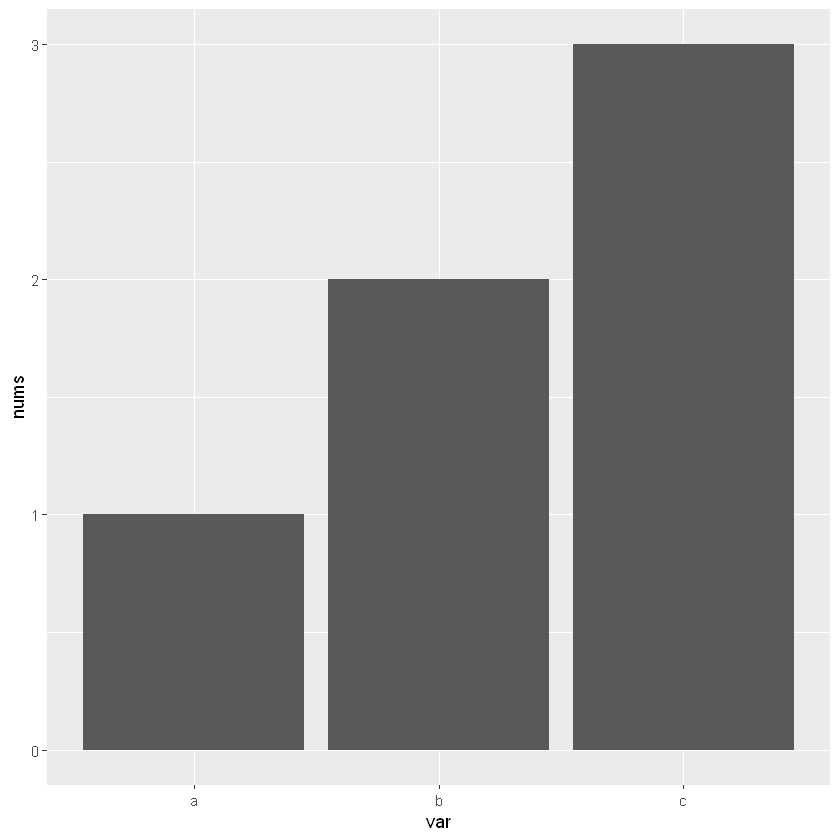

In [24]:
df <- data.frame(var=c("a", "b", "c"), nums=c(1:3))
# 显示数据
df
# Y axis is explicit. 'stat=identit
# 显示y
plot2 <- ggplot(df, aes(x=var, y=nums)) + 
geom_bar(stat = "identity")
print(plot2)

### 6.4 自定义布局
gridExtra软件包提供了在单个网格中配置多个ggplots的功能。

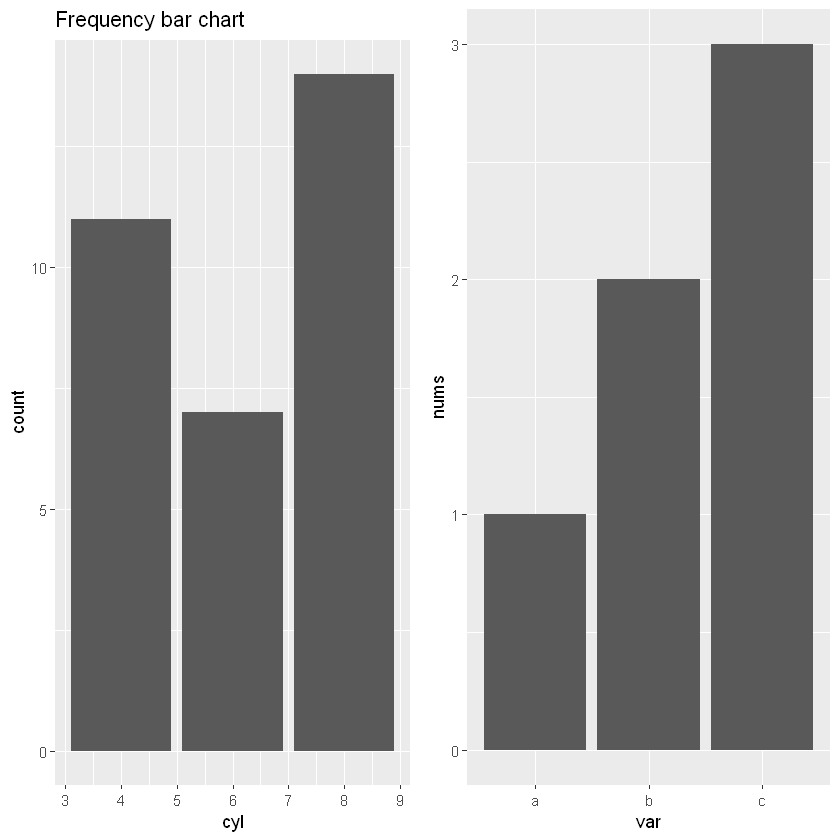

In [25]:
library(gridExtra)
# 分配图像
grid.arrange(plot1, plot2, ncol=2)

### 6.5 翻转坐标轴

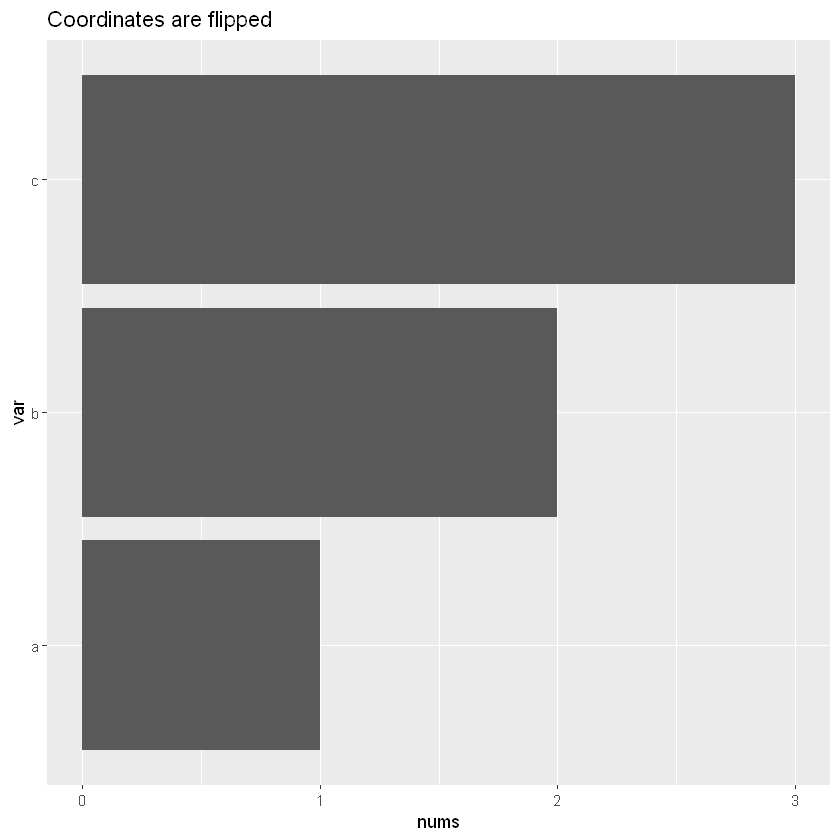

In [26]:
df <- data.frame(var=c("a", "b", "c"), nums=c(1:3))
ggplot(df, aes(x=var, y=nums)) + 
geom_bar(stat = "identity") + 
# 翻转坐标轴
coord_flip() + 
labs(title="Coordinates are flipped")

### 6.6 调整X和Y轴范围
有3种方法可以更改X和Y轴范围：
1. Using coord_cartesian(xlim=c(x1,x2))
2. Using xlim(c(x1,x2))
3. Using scale_x_continuous(limits=c(x1,x2))

第 2项和第3项将从数据本身中删除超出限制的数据点。因此，如果添加任何平滑线等，结果将失真。项目1（coord_cartesian）不会删除任何数据点，而是会放大到图表的特定区域。

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



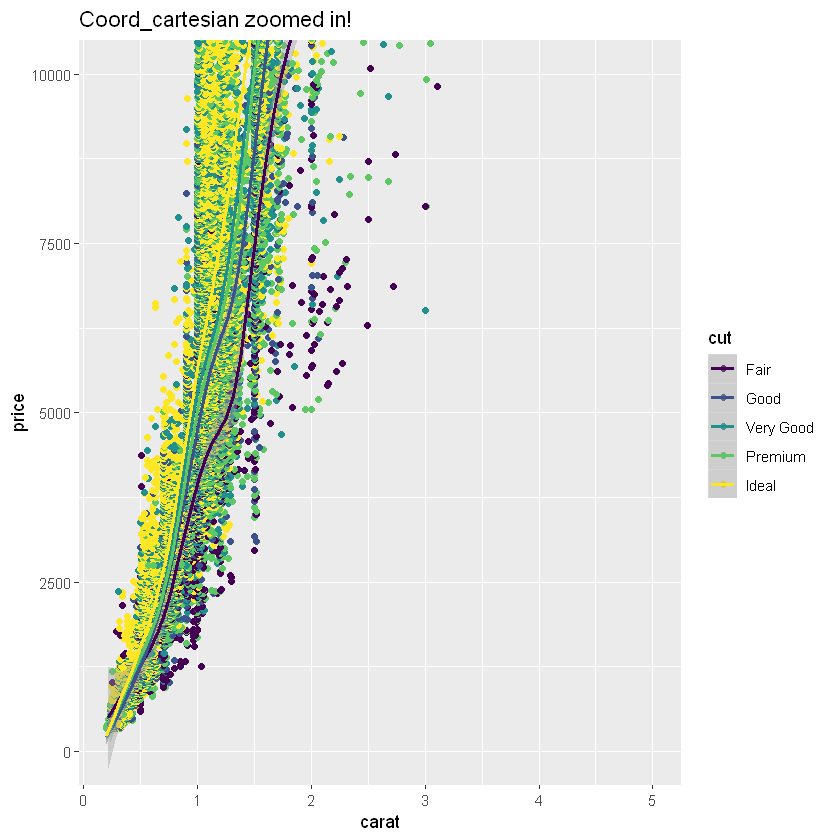

In [27]:
ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
geom_point() + 
geom_smooth() + 
# 设置y轴范围
coord_cartesian(ylim=c(0, 10000)) + 
labs(title="Coord_cartesian zoomed in!")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 5222 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 5222 rows containing missing values (geom_point)."


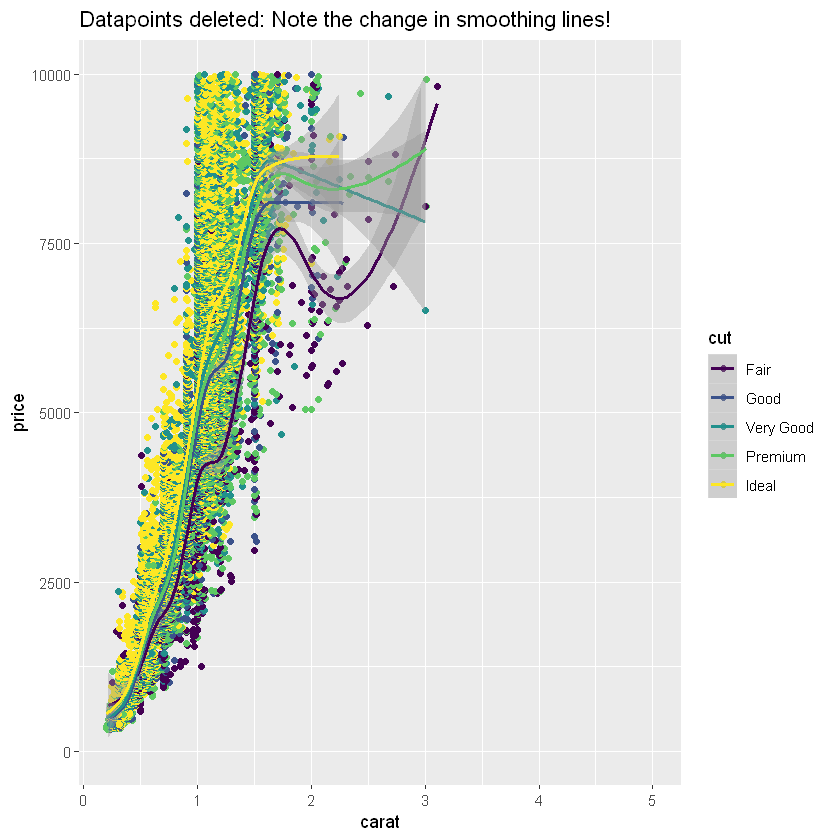

In [28]:
ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
geom_point() + 
geom_smooth() + 
# 设定范围
ylim(c(0, 10000)) + 
labs(title="Datapoints deleted: Note the change in smoothing lines!")

### 6.7 等坐标轴
添加coord_equal()到ggplot会将X和Y轴的限制设置为相等。下面是一个无意义的示例

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



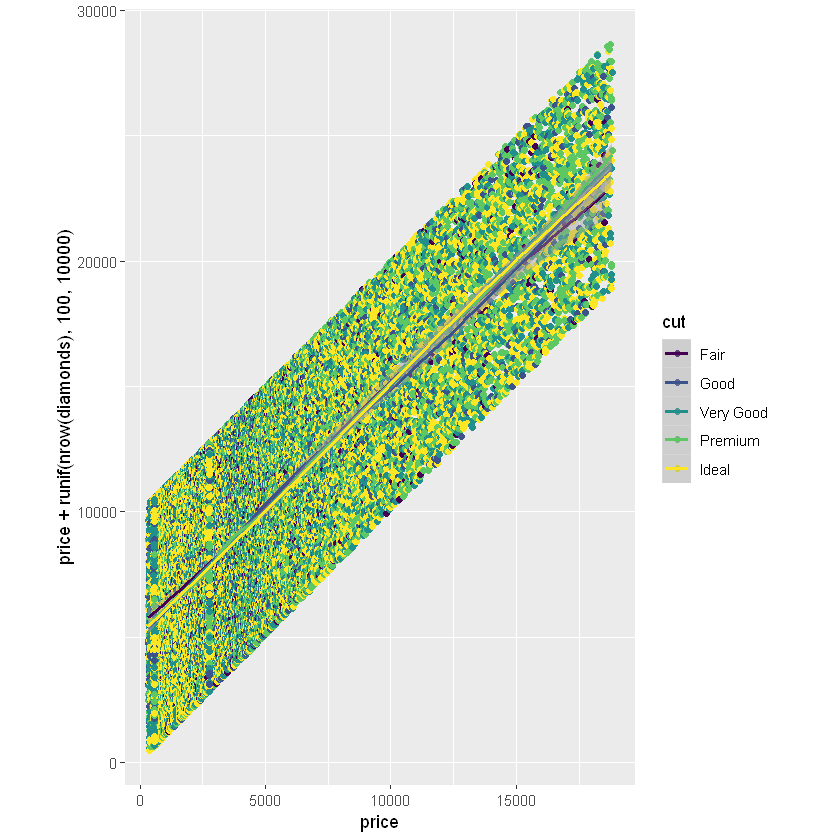

In [29]:
ggplot(diamonds, aes(x=price, y=price+runif(nrow(diamonds), 100, 10000), color=cut)) + 
geom_point() + 
geom_smooth() + 
coord_equal()

### 6.8 变更主题

除了基本的ggplot2主题外，您还可以使用这些内置主题之一来更改绘图的外观。
1. theme_gray()
2. theme_bw()
3. theme_linedraw()
4. theme_light()
5. theme_minimal()
6. theme_classic()
7. theme_void()

[ggthemes软件包](https://github.com/jrnold/ggthemes)提供了模仿知名杂志和软件的其他ggplot主题。这是一个如何更改主题的示例。



`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



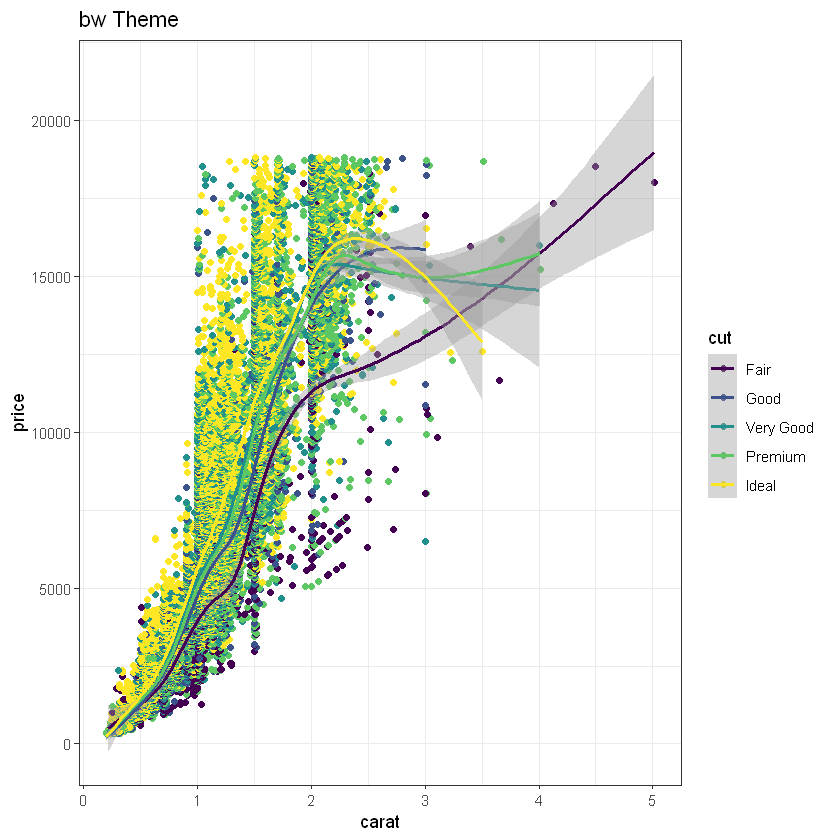

In [30]:
ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
geom_point() + 
geom_smooth() +
# 更改主题
theme_bw() + 
labs(title="bw Theme")

### 6.9 图例删除和更改位置
通过设置主题（legend.position=“none”），可以删除图例。通过将其设置为“顶部”，即主题（legend.position=“顶部”），可以在图像周围移动图例。通过将legend.position设置为绘图内部的坐标，可以将图例放置在绘图内部。legend.justification表示图例的锚点，即将放置在legend.position给定坐标上的点。

In [31]:
# 无图例
p1 <- ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
geom_point() + 
geom_smooth() + 
# 无图例
theme(legend.position="none") + 
labs(title="legend.position='none'")

In [32]:
p2 <- ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
geom_point() + 
geom_smooth() + 
# legend at top 设置图例在图形顶部
theme(legend.position="top") + 
labs(title="legend.position='top'")  

In [33]:
p3 <- ggplot(diamonds, aes(x=carat, y=price, color=cut)) + 
geom_point() + 
geom_smooth() + 
labs(title="legend.position='coords inside plot'") + 
# legend inside the plot 设置图形位置
theme(legend.justification=c(1,0), legend.position=c(1,0))  

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



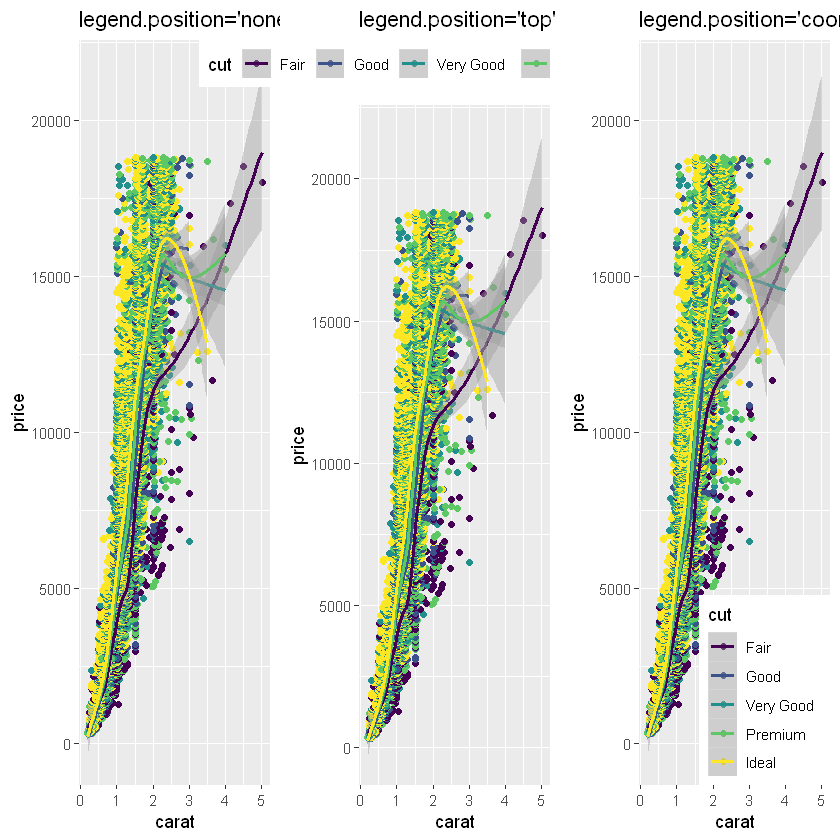

In [34]:
# arrange统一显示图像
grid.arrange(p1, p2, p3, ncol=3)  

### 6.10 网格线

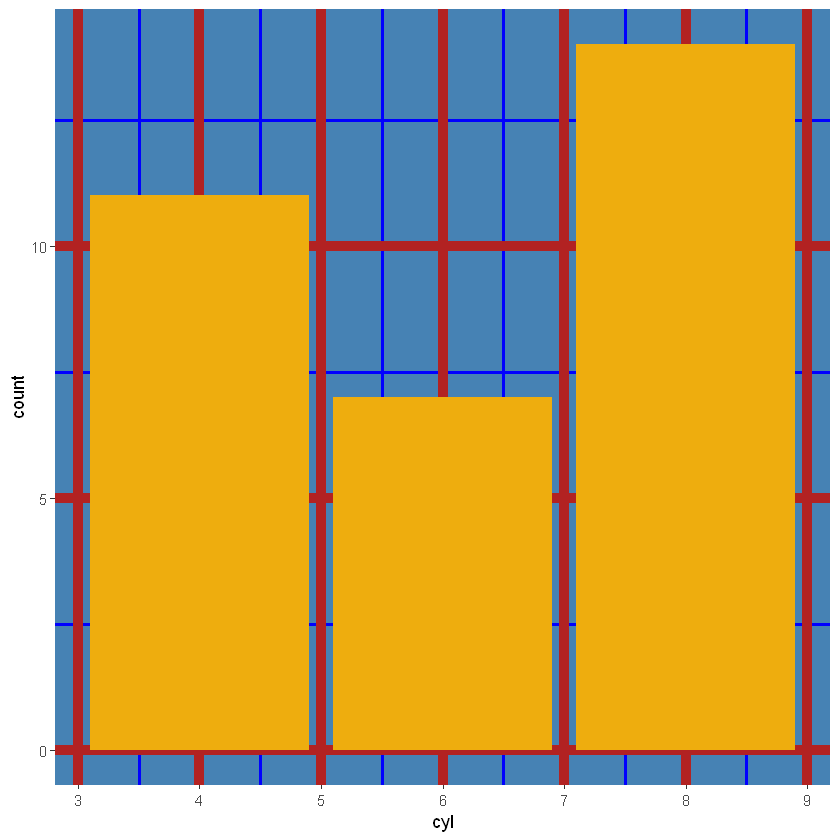

In [35]:
ggplot(mtcars, aes(x=cyl)) + 
geom_bar(fill='darkgoldenrod2') +
theme(panel.background = element_rect(fill = 'steelblue'),
# 设置主网格线
panel.grid.major = element_line(colour = "firebrick", size=3),
panel.grid.minor = element_line(colour = "blue", size=1))

### 6.11 图边距和背景

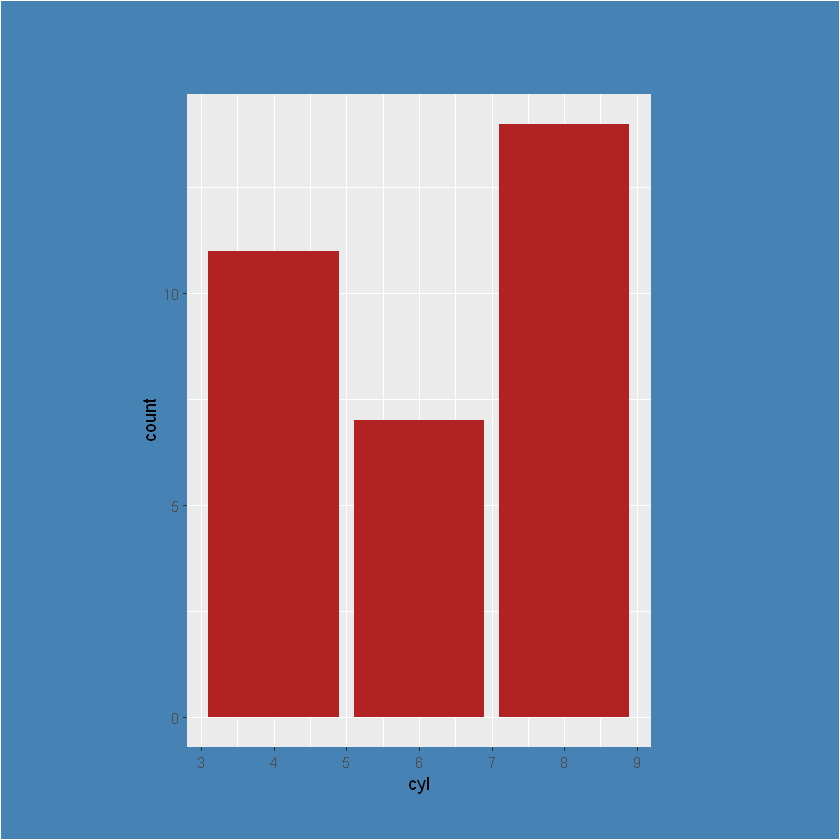

In [36]:
ggplot(mtcars, aes(x=cyl)) + 
geom_bar(fill="firebrick") + 
# top, right, bottom, left
# plot.background设置背景，plot.margain设置边距
theme(plot.background=element_rect(fill="steelblue"), plot.margin = unit(c(2, 4, 1, 3), "cm")) 

### 6.12 注释


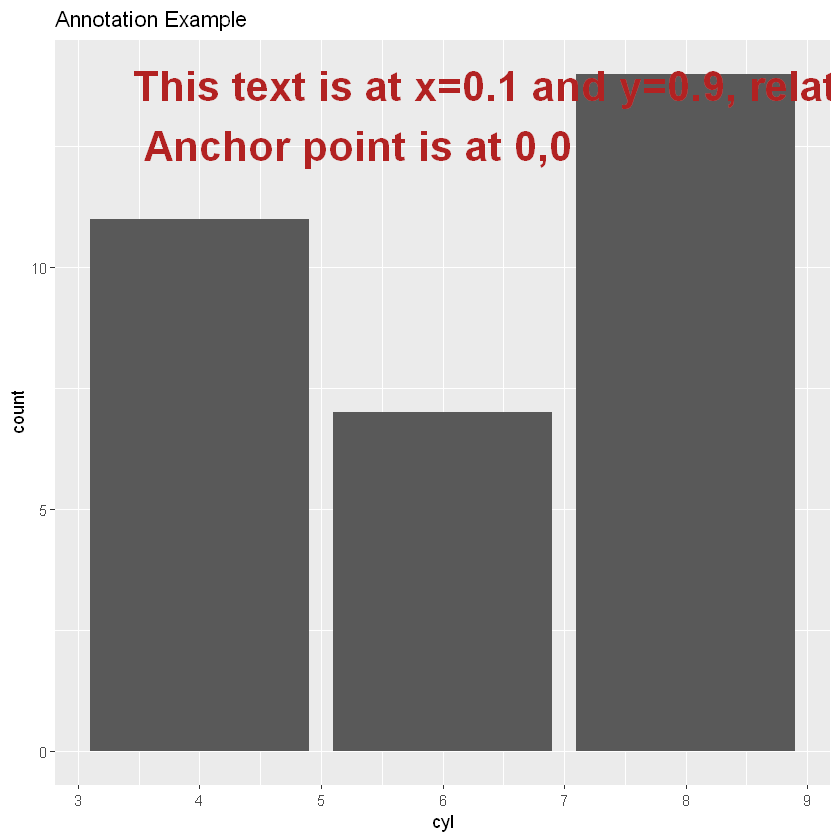

In [37]:
library(grid)
# 添加注释
my_grob = grobTree(textGrob("This text is at x=0.1 and y=0.9, relative!\n Anchor point is at 0,0", x=0.1,  y=0.9, hjust=0,
  gp=gpar(col="firebrick", fontsize=25, fontface="bold")))
ggplot(mtcars, aes(x=cyl)) + 
geom_bar() + 
annotation_custom(my_grob) + 
labs(title="Annotation Example")

### 6.13 保存ggplot

In [38]:
plot1 <- ggplot(mtcars, aes(x=cyl)) + 
geom_bar()
# 保存图像
ggsave("myggplot.png")  # saves the last plot.
ggsave("myggplot.png", plot=plot1)  # save a stored ggplot

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

